### Import Libraries

In [97]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow import keras 


### Datasets
* The datasets is collect from `keras.datasets.fashion_minst` and split into train and test images.
* Test Images are 60000 images with shape of [28, 28] with test images of  10000. 

In [98]:
fashion_minst = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels)=fashion_minst.load_data()


In [99]:
train_images.shape


(60000, 28, 28)

Our labels are intergers ranging from 0-9 

In [100]:
class_names  = ['T-shirt/top', 'Trouser','Pullover' ,'Dress','Coat','Sandal','Sneaker', 'Bag', 'Ankle boot']

In [ ]:
for i in range(10):
  plt.figure()
  plt.imshow(train_images[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()

## Data Preprocessing 
* This is the last step before building the model. This means applying data transformation before feeding the model.

In [102]:
train_images = train_images / 255.0
test_images = test_images /255.0

### Model Building
* We will use Sequential because a Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [103]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)), # Flatten allows us to input the required shape by flattening. This is the Input layer
  keras.layers.Dense(128, activation='relu'), # Hidden layer 
  keras.layers.Dense(10, activation='softmax') # Output layer 
  
])

/home/naruto/miniconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [104]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

In [105]:
model.compile(optimizer =  'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

### Model Training
* It has hyparameters like epochs, data, 

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/50
  29/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9347 - loss: 0.2059

2025-02-28 22:42:58.655476: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9132 - loss: 0.2282
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9179 - loss: 0.2179
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9201 - loss: 0.2137
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9214 - loss: 0.2076
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9234 - loss: 0.2033
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9252 - loss: 0.2004
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9280 - loss: 0.1891
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9301 - loss: 0.1844
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9336 - loss: 0.1781
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9345 - loss: 0.1742
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9375 - loss: 0.1671
Epoch 12/50
1875/1875 ━━━━━━━━━━━━━━━━━

### Model Testing
* Verbose is like how many words are needed in the console or to be output.
* We use `model.evaluate` to the test accuracy of the model

In [109]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print("Model accuracy is:", test_acc * 100, "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8783 - loss: 0.6171
Model accuracy is: 88.26000094413757 %


### Predictions
* We will use our datasets to make predictions using our model and the plot the image and confirm the class name of the predicted image.

In [110]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Trouser


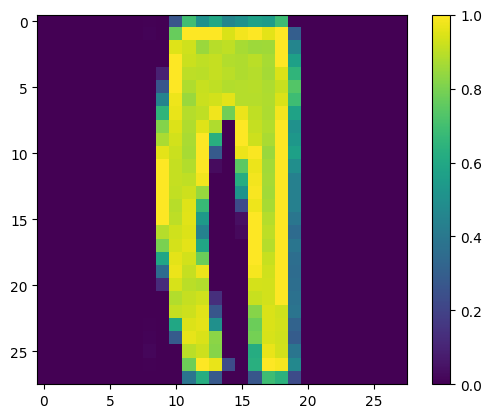

In [114]:
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [117]:
model_path =model

In [121]:
class ImagePredictor:
    def __init__(self, model, class_names, test_images):
        """
        Initialize the predictor with a trained model, class names, and test images.
        :param model: A trained Keras model (not a file path).
        :param class_names: List of class names.
        :param test_images: Test image dataset.
        """
        self.model = model  # Directly use the passed model
        self.class_names = class_names
        self.test_images = test_images
    
    def get_number(self, number):
        """Get the image from the dataset based on index."""
        return self.test_images[number]
    
    def image_plot(self, number):
        """Predict the class of the image and plot it."""
        image = self.get_number(number)
        image_batch = np.expand_dims(image, axis=0)  # Expand dimensions for model input
        prediction = self.model.predict(image_batch)
        predicted_class = self.class_names[np.argmax(prediction)]
        
        plt.imshow(image, cmap=plt.cm.binary)
        plt.title(f"Predicted: {predicted_class}")
        plt.axis("off")
        plt.show()

# Example usage:
# predictor = ImagePredictor(model, class_names, test_images)
# predictor.image_plot(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


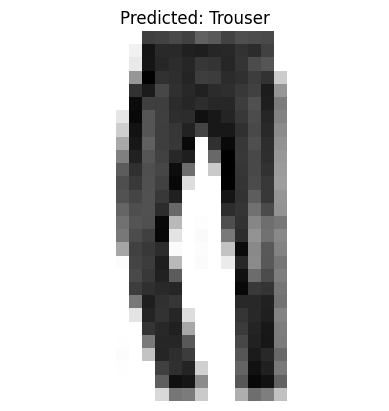

Predicted image displayed for index 5.


In [129]:
predictor = ImagePredictor(model_path, class_names, test_images)


number = int(input("Enter the number of the image to predict"))
predictor.image_plot(number)
print(f"Predicted image displayed for index {number}.")


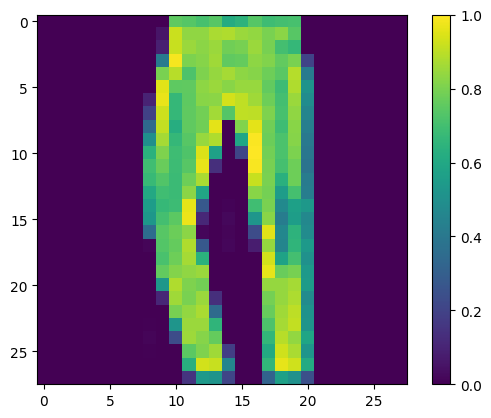

In [135]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.show()